In [2]:
import schedule
import time
import datetime as dt
import logging
import pandas as pd
import numpy as np
import pytz
import sqlite3
import sqlalchemy

db_data_path = r'/Users/pankajti/dev/git/wqu/capstone/data/db/capstone.db'
con = sqlite3.connect(db_data_path)
dbEngine = sqlalchemy.create_engine(f'sqlite:///{db_data_path}')


trades = pd.read_sql("select * from trades",dbEngine)


/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_45703/2032447191.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
trades.head()

,trade_time,ticker,side,quantity,price,strategy,creatime
0,2024-03-26 09:26:00+05:30,PASUPTAC.NS,buy,1,40.2999992370606,price_breakout,2024-04-19 11:11:32.999214
1,2024-03-26 14:03:00+05:30,SANGAMIND.NS,buy,1.0,448.350006103516,price_breakout,2024-04-19 11:19:10.088254
2,2024-03-26 14:05:00+05:30,GANDHITUBE.NS,buy,1.0,776.049987792969,price_breakout,2024-04-19 11:19:18.486934
3,2024-03-26 15:03:00+05:30,GANDHITUBE.NS,sell,1.0,740.900024414063,price_breakout,2024-04-19 11:20:46.621785
4,2024-03-26 15:04:00+05:30,SANGAMIND.NS,sell,1.0,454.0,price_breakout,2024-04-19 11:20:46.621785


In [4]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trade_time  170 non-null    object
 1   ticker      170 non-null    object
 2   side        170 non-null    object
 3   quantity    170 non-null    object
 4   price       170 non-null    object
 5   strategy    170 non-null    object
 6   creatime    170 non-null    object
dtypes: object(7)
memory usage: 9.4+ KB


In [5]:
trades.describe()

,trade_time,ticker,side,quantity,price,strategy,creatime
count,170,170,170,170,170,170,170
unique,108,80,2,2,166,1,84
top,2024-03-28 15:04:00+05:30,AGRITECH.NS,buy,1.0,37.0999984741211,price_breakout,2024-04-19 19:37:05.240720
freq,10,6,85,151,3,170,14


In [8]:
trades['tdate'] = trades.trade_time.str[:10]

In [9]:
trades

,trade_time,ticker,side,quantity,price,strategy,creatime,tdate
0,2024-03-26 09:26:00+05:30,PASUPTAC.NS,buy,1,40.2999992370606,price_breakout,2024-04-19 11:11:32.999214,2024-03-26
1,2024-03-26 14:03:00+05:30,SANGAMIND.NS,buy,1.0,448.350006103516,price_breakout,2024-04-19 11:19:10.088254,2024-03-26
2,2024-03-26 14:05:00+05:30,GANDHITUBE.NS,buy,1.0,776.049987792969,price_breakout,2024-04-19 11:19:18.486934,2024-03-26
3,2024-03-26 15:03:00+05:30,GANDHITUBE.NS,sell,1.0,740.900024414063,price_breakout,2024-04-19 11:20:46.621785,2024-03-26
4,2024-03-26 15:04:00+05:30,SANGAMIND.NS,sell,1.0,454.0,price_breakout,2024-04-19 11:20:46.621785,2024-03-26
...,...,...,...,...,...,...,...,...
165,2024-04-18 13:22:00+05:30,INDORAMA.NS,buy,1.0,46.8499984741211,price_breakout,2024-04-20 01:16:33.924303,2024-04-18
166,2024-04-18 15:01:00+05:30,INDORAMA.NS,sell,1.0,44.2000007629395,price_breakout,2024-04-20 01:18:23.861961,2024-04-18
167,2024-04-18 15:04:00+05:30,MASTEK.NS,sell,1.0,2830.10009765625,price_breakout,2024-04-20 01:18:23.861961,2024-04-18
168,2024-04-18 15:04:00+05:30,HARSHA.NS,sell,1.0,416.149993896484,price_breakout,2024-04-20 01:18:23.861961,2024-04-18


In [11]:
trades_data = trades[['tdate', 'ticker', 'side','quantity' , 'price']]

In [20]:
trades_data['price'] = trades_data.price.astype(float)

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_45703/686818239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_data['price'] = trades_data.price.astype(float)


In [28]:
trades_data['side'] =  trades_data.apply(lambda x : 1 if x['side']=='buy' else -1, axis =1 )*trades_data.quantity.astype(float)

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_45703/3875672729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_data['side'] =  trades_data.apply(lambda x : 1 if x['side']=='buy' else -1, axis =1 )*trades_data.quantity.astype(float)


In [34]:
trades_data['trades_cost'] = trades_data['side']*trades_data.price

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_45703/724449048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_data['trades_cost'] = trades_data['side']*trades_data.price


In [35]:
trades_data.groupby('ticker').sum()['trades_cost']

ticker
ADVANIHOTR.NS    -177.799995
AEGISCHEM.NS    -1044.100037
AGRITECH.NS     -1363.300003
AHLADA.NS        -235.250000
AMJLAND.NS        -69.549999
                    ...     
VINYLINDIA.NS    -758.200012
WEALTH.NS       -1303.950012
YUKEN.NS        -1867.400024
ZENITHEXPO.NS    -349.849991
ZUARI.NS         -406.449997
Name: trades_cost, Length: 80, dtype: float64

In [37]:
trades_data.groupby('tdate').sum()['trades_cost']

tdate
2024-03-26    -2496.700016
2024-03-27    -3710.649971
2024-03-28    -5351.500042
2024-04-01    -9200.750046
2024-04-02   -12318.800001
2024-04-03    -4082.950005
2024-04-10    -4857.150047
2024-04-12    -8405.950043
2024-04-15    -6228.750019
2024-04-16    -5485.650059
2024-04-18    -7008.049992
Name: trades_cost, dtype: float64

<Axes: xlabel='tdate'>

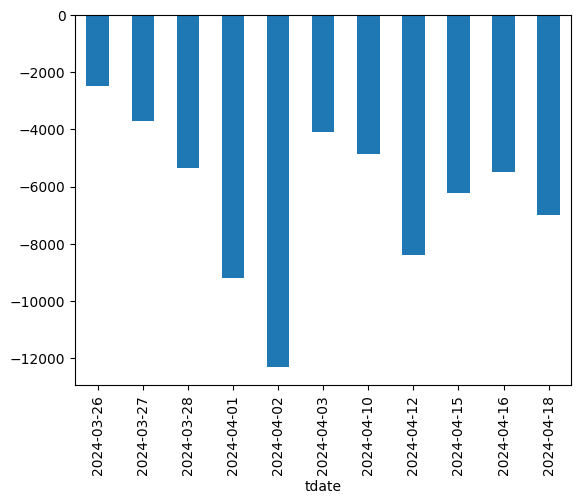

In [38]:
trades_data.groupby('tdate').sum()['trades_cost'].plot(kind='bar')